<a href="https://colab.research.google.com/github/MingisASaltedFish/MSBD-5002/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [7]:
!pip install ruptures

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.5 MB/s eta 0:00:00


In [8]:
import ruptures as rpt # ruptures package !

In [15]:
# creation of data
n, dim = 500, 1
n_bkps, sigma = 3, 5
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

In [18]:
#signal

In [25]:
list_data = []
for i in range(len(signal)):
  list_data.append(signal[i][0])


#list_data


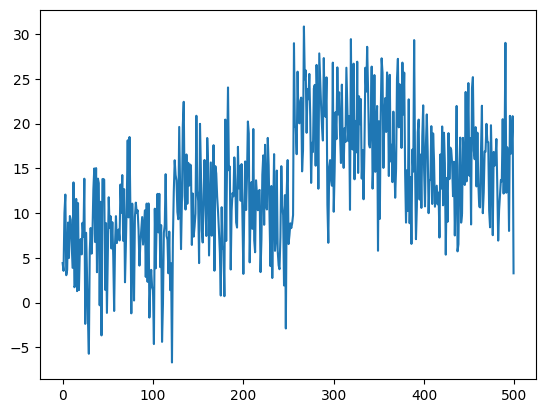

In [30]:
plt.plot(list_data)

<ipython-input-24-1c12df2c6232>:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m--" (-> color='m'). The keyword argument will take precedence.
  plt.plot(x_lim,[-1.96,-1.96],'m--',color = 'r')
<ipython-input-24-1c12df2c6232>:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m--" (-> color='m'). The keyword argument will take precedence.
  plt.plot(x_lim,[1.96,1.96],'m--',color = 'r')


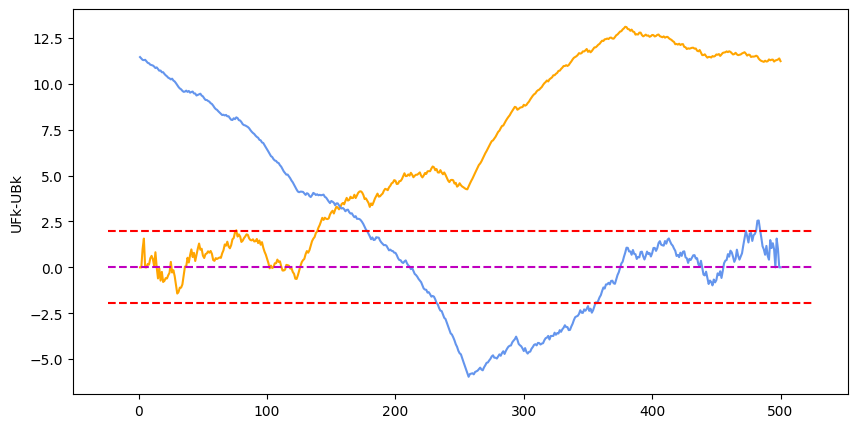

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#读取时间序列数据
data = list_data
#定义时间和径流数据列
x = list(range(len(data)))
y = list_data#data.to_list
#获取样本数据
n = len(y)

#正序计算
#定义累计量序列Sk，长度n，初始值为0
Sk = np.zeros(n)
UFk = np.zeros(n)
#定义Sk序列元素s
s = 0

#i从2开始，根据统计量UFk公式，i=1时，Sk（1）、E（1）、Var（1）均为0，此时UFk无意义，因此公式中，令UFk（1） = 0
for i in range(2,n):
    for j in range(1,i):
        if y[i]>y[j]:
            s += 1
    Sk[i] = s
    E = i * (i - 1)/4
    Var = i * (i - 1) * (2 * i + 5)/72
    UFk[i] = (Sk[i] - E)/np.sqrt(Var)

#逆序计算，构造逆序列y2，长度为n，初值为0
#定义逆累计量序列Sk2，长度n，初始值为0
#定义逆统计量序列Sk2，长度n，初始值为0
y2 = np.zeros(n)
Sk2 = np.zeros(n)
UBk = np.zeros(n)

#s归零
s = 0
#按时间序列逆转样本
y2 = y[::-1]

# i从2开始，根据统计量UBk公式，i=1时，Sk（1）、E（1）、Var（1）均为0，此时UFk无意义，因此公式中，令UBk（1） = 0
for i in range(2, n):
    for j in range(1, i):
        if y2[i] > y2[j]:
            s += 1
    Sk2[i] = s
    E = i * (i - 1) / 4
    Var = i * (i - 1) * (2 * i + 5) / 72
    UBk[i] = -(Sk2[i] - E) / np.sqrt(Var)

#逆转逆序列
UBk2 = UBk[::-1]

#画图

plt.figure(figsize=(10,5))
plt.plot(range(1 ,n+1),UFk,label = 'UFk',color = 'orange')
plt.plot(range(1 ,n+1),UBk2,label = 'UBk',color = 'cornflowerblue')
plt.ylabel('UFk-UBk')
x_lim = plt.xlim()
plt.plot(x_lim,[-1.96,-1.96],'m--',color = 'r')
plt.plot(x_lim, [0,0],'m--')
plt.plot(x_lim,[1.96,1.96],'m--',color = 'r')
plt.show()

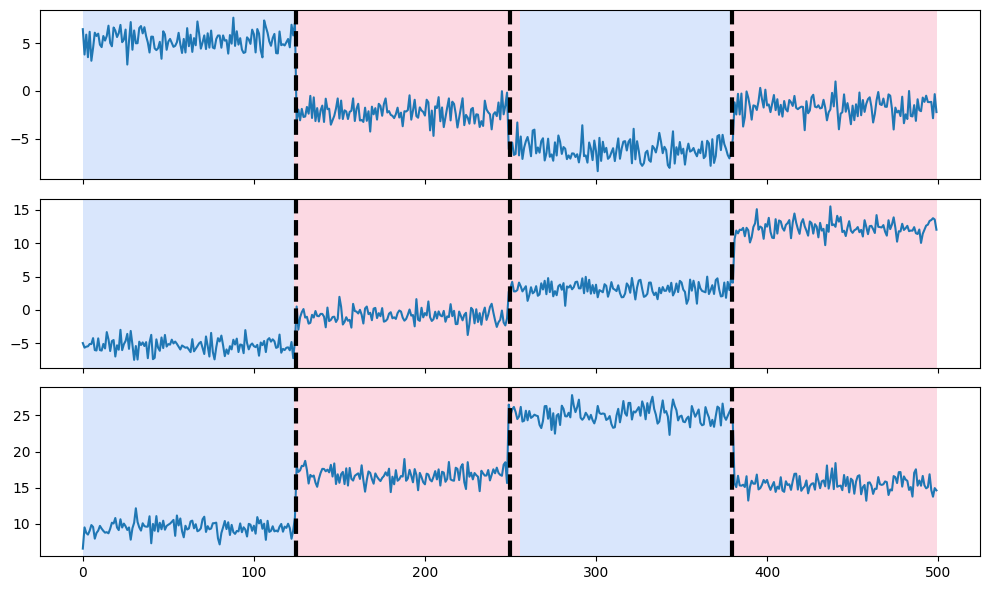

In [31]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt

# creation of data
n, dim = 500, 3
n_bkps, sigma = 3, 1
signal, b = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

# change point detection
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal)
my_bkps = algo.predict(pen=7)

# show results
fig, ax = rpt.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()